In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
data=pd.read_csv("iris.csv")
data2 = data.drop(['Class','Type'],axis=1)
prom = data2.mean(axis=0)
desv = data2.std(axis=0)
data_norm = (data2-prom)/desv

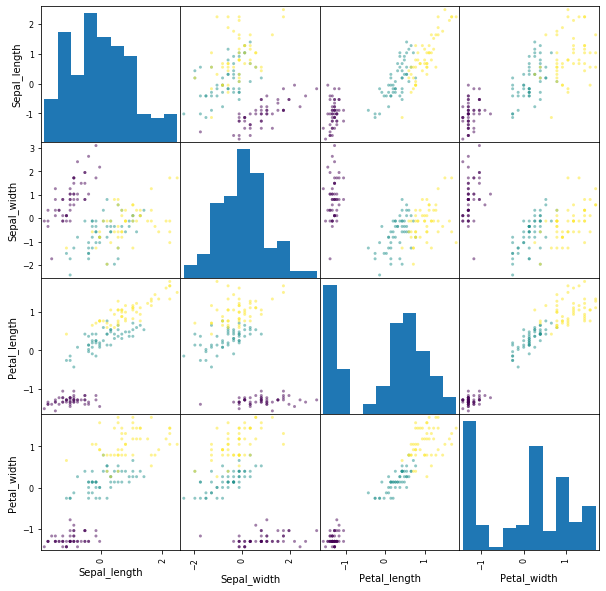

In [35]:
d = pd.plotting.scatter_matrix(data_norm,c=data["Type"],figsize=(10, 10))

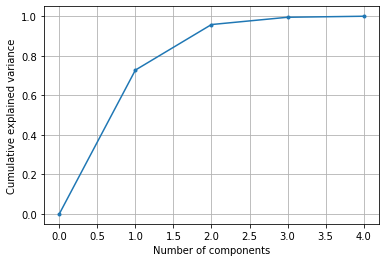

In [40]:
matriz = np.array(data_norm)
mcov = np.dot(matriz.T,matriz.conj())
val,vect = np.linalg.eig(mcov)
vect1 = vect[:,0]
vect2 = vect[:,1]
val = sorted(val,reverse=True)
variance = [0]+list((val/sum(val)).cumsum())
componentes = np.linspace(0,len(variance)-1,len(variance))
plt.plot(componentes,variance,marker='.')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

Con las dos primeras componentes principales se captura mas del 90% de la varianza

In [37]:
x = np.dot(vect1,matriz.T)
y = np.dot(vect2,matriz.T)
m2 = np.array([x,y])

In [43]:
def plot_data(X, y):
    plt.figure(figsize=(9,7.5))
    y_unique = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        plt.scatter(this_X[:, 0], this_X[:, 1],  c=color, alpha=0.5, edgecolor='k', label="Class %s" % this_y)
    plt.legend(loc="best")
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title("Data")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


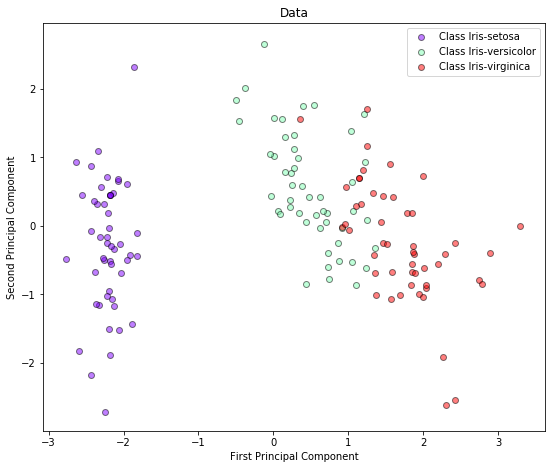

In [44]:
plot_data(m2.T,data['Class'])

De esta gráfica se puede inferir que los valores de la segunda componente principal se encuentran mas o menos en el mismo rango, en cambio los de la primera componente principal si muestran diferentes rangos entre clases, debido a que es la componente que más varianza explica, por lo cual es más útil para diferir entre las diferentes clases de Iris.